# **Project-3**

***Project Title:*** Predicting Diabetes

***Project Description:*** In this project, you will build a machine learning model to predict whether a person has diabetes or not based on their health metrics such as BMI, blood pressure, glucose levels, etc. The data set includes information on individuals' health metrics, including whether they have diabetes or not.

***Dataset Details:*** The data set contains over 750 records of female patients aged 21 years or older. The dataset has eight features (e.g., age, BMI, blood pressure, insulin level, etc.) and one target variable that indicates whether the person has diabetes or not.

Pregnancies: Number of pregnancies

Glucose: Glucose level in blood

BloodPressure: Blood pressure

SkinThickness: Thickness of the skin

Insulin: Insulin level in blood

BMI: Body Mass Index

DiabetesPedigreeFunction: Inheritance of diatbetes condition through generations

Age: Age

Outcome: 1 is Diabetic, 0 is non-Diabetic

***Datasets Location:*** Canvas -> Modules -> Week 9 -> Datasets -> **"patients.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several machine learning models on the preprocessed data set.

3) *Model Evaluation:* You will evaluate the models' performance using several metrics such as accuracy, precision, recall, specificity, F1-score, and ROC curve analysis. You will also compare the models' performance and select the best-performing one.

4) *Deployment:* Once you have selected the best-performing model, you will deploy it and make predictions on new, unseen data.

This project will give you hands-on experience with supervised classification, data preprocessing, and model evaluation. It also has real-world applications in healthcare, where early detection of diabetes can help in the timely management of the disease.

Check all metrics:

- F1 score
- ROC curve
- Precision score
- Accuracy score


In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

patients = pd.read_csv("patients.csv")

"""NEED TO SITE THIS"""


# patients.describe()
missingValues = patients.isna()
missingFlag = True

for col in missingValues.columns:
    for index, valueInIndex in missingValues[col].items():
        if valueInIndex:
            print(f"Missing value at index {index} in column {col}")
            missingFlag = False
        

if missingFlag:
    print("There are no missing values in the DataFrame")

There are no missing values in the DataFrame


In [93]:
from sklearn.model_selection import train_test_split

X = patients.drop(columns=['Outcome'])
y = patients['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
            'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
#SITE THIS

def fit_and_print(myPipeline, myXTrain, myYTrain, myXTest, myYTest):
  myPipeline.fit(myXTrain, myYTrain)
  test_preds = myPipeline.predict(myXTest)

  print("Accuracy: " + str(accuracy_score(test_preds, myYTest)))
  print("Precision Score: " + str(precision_score(test_preds, myYTest)))
  print("F1 Score: " + str(f1_score(test_preds, myYTest)))
  print("Recall Score: " + str(recall_score(test_preds, myYTest)))

In [95]:
#Site this
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def create_ROC_Curve(pipeline, p_X_test, p_y_test):

    prob = pipeline.predict_proba(p_X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(p_y_test, prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, prob)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [96]:
#Site this
from sklearn.metrics import precision_recall_curve

def create_precision_recall_curve(pipeline, p_X_test, p_y_test):

    prob = pipeline.predict_proba(p_X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(p_y_test, prob)
    

    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([min(thresholds), max(thresholds), 0, 1])

Accuracy: 0.8133333333333334
Precision Score: 0.4666666666666667
F1 Score: 0.6000000000000001
Recall Score: 0.84


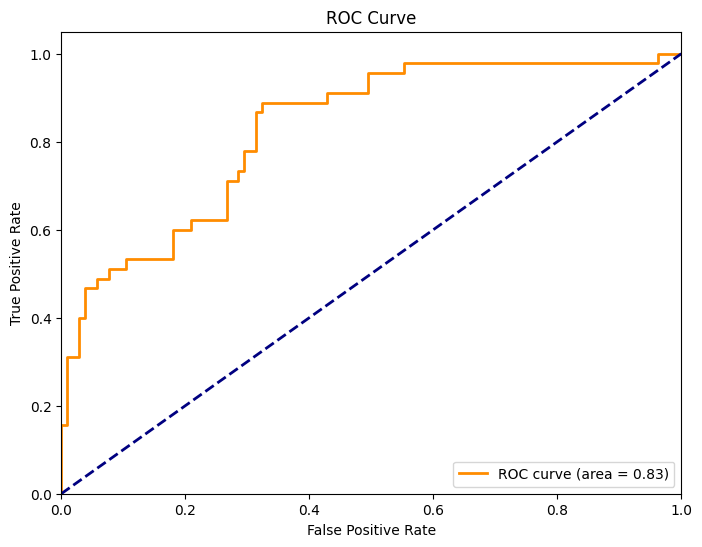

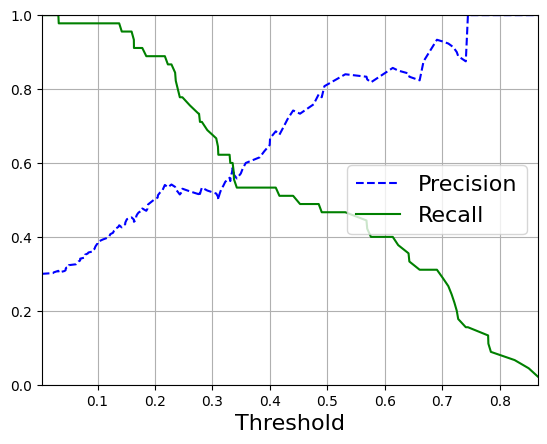

In [97]:
#A imputer was not used here due to the data set not having any null values
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

log_clf = LogisticRegression(random_state=42, solver='lbfgs')

#Site this
preprocess = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', log_clf)
])

fit_and_print(preprocess, X_train, y_train, X_test, y_test)

create_ROC_Curve(preprocess, X_test, y_test)

create_precision_recall_curve(preprocess, X_test, y_test)